# Imports

In [35]:
import numpy as np
from matplotlib import pyplot as plt

# Load data

In [36]:
#load data from spreadsheet into array
data_file_in = open("all_samples_data.csv", "r")
#ndmin to force 2d array even if there is one row
all_data = np.array(np.loadtxt(data_file_in, delimiter=",", skiprows=1), ndmin=2)
data_file_in.close()

#mask to allow only points with nonzero values of xrr thickness
mask = np.array(all_data[0:,1], dtype=bool)

# simple linear regression
since an x/y linear regression can be solved analytically with no trouble, it's easier for me to just do it here instead of figuring out all the calls to `scipy.optimize`

In [37]:
def simpleLinReg(x, y):
    x_mean = np.average(x)
    y_mean = np.average(y)

    slope = np.sum( (x - x_mean)*(y - y_mean) ) / np.sum( (x - x_mean)**2 )
    intercept = y_mean - slope*x_mean

    return slope, intercept

# Figure parameters

In [38]:
ms = 15 #marker size
title_font = {"fontsize": 24}
legend_font_size = 16
axes_font = {"fontsize": 20}
tick_label_size = 16

# Plot line intensities vs. xrr thickness

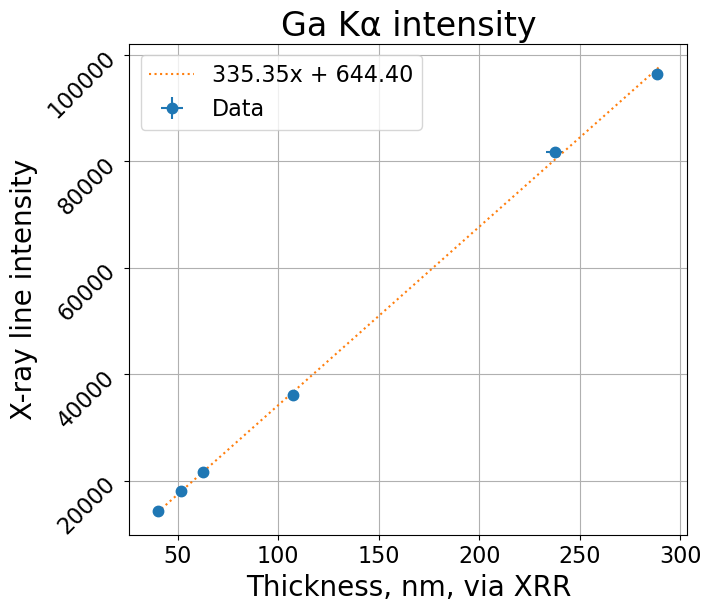

In [39]:
id = 0
#0 for Ga ka
#1 for Ga kb
#2 for Ga L
#3 for Si ka
#4 for P Ka

f, ax = plt.subplots(figsize=(7, 6), layout="constrained")
                      
ax.errorbar(all_data[0:, 1][mask], all_data[0:, 5+id][mask], xerr=all_data[0:, 2][mask], yerr = all_data[0:, 10+id][mask],
            linestyle="None", marker=".", markersize=ms, label = "Data")

fit_ga_ka = simpleLinReg(all_data[0:,1][mask], all_data[0:,5+id][mask])

ax.plot(np.linspace(40, 290), np.linspace(40, 290)*fit_ga_ka[0] + fit_ga_ka[1], ":",
            label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka))

titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]

ax.grid(True)
ax.set_xlabel("Thickness, nm, via XRR", fontdict=axes_font)
ax.set_ylabel("X-ray line intensity", fontdict=axes_font)
ax.set_title(titles[id], fontdict=title_font)
ax.legend(fontsize=legend_font_size)
ax.tick_params(axis="both", which="major", labelsize=tick_label_size)
ax.tick_params(axis="y", rotation=45)

plt.savefig("xrr_thickness_graph.png")

# plot line intensities vs. ellipsometry thickness

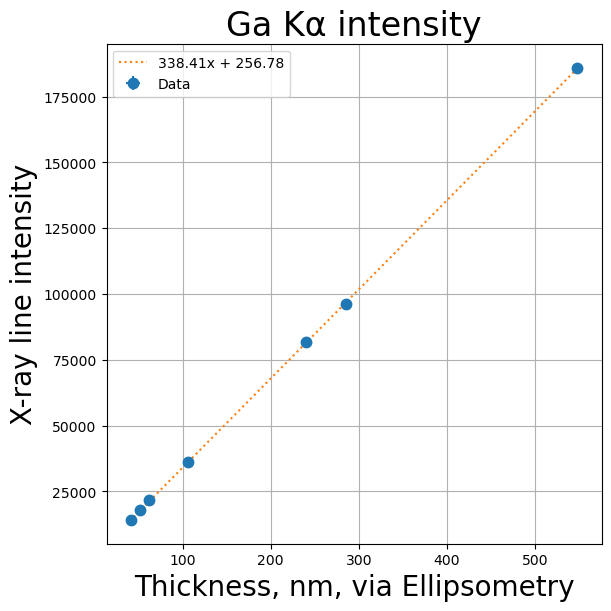

In [40]:
id = 0
#0 for Ga ka
#1 for Ga kb
#2 for Ga L
#3 for Si ka
#4 for P Ka

f, ax = plt.subplots(figsize=(6, 6), layout="constrained")
                      
ax.errorbar(all_data[0:, 3], all_data[0:, 5+id], xerr=all_data[0:, 4], yerr = all_data[0:, 10+id],
            linestyle="None", marker=".", markersize=ms, label = "Data")

fit_ga_ka = simpleLinReg(all_data[0:,3], all_data[0:,5+id])

ax.plot(np.linspace(40, 550), np.linspace(40, 550)*fit_ga_ka[0] + fit_ga_ka[1], ":",
            label="{0[0]:.2f}x + {0[1]:.2f}".format(fit_ga_ka))

titles = ["Ga K\u03b1 intensity",
          "Ga K\u03b2 intensity",
          "Ga L group intensity",
          "Si K\u03b1 intensity",
          "P K\u03b1 intensity"]

ax.grid(True)
ax.set_xlabel("Thickness, nm, via Ellipsometry", fontdict=axes_font)
ax.set_ylabel("X-ray line intensity", fontdict=axes_font)
ax.set_title(titles[id], fontdict=title_font)
ax.legend()

plt.savefig("ell_thickness_graph.png")

# Plot XRR results vs ellipsometry

0.9959590115799695 0.6001362510804711


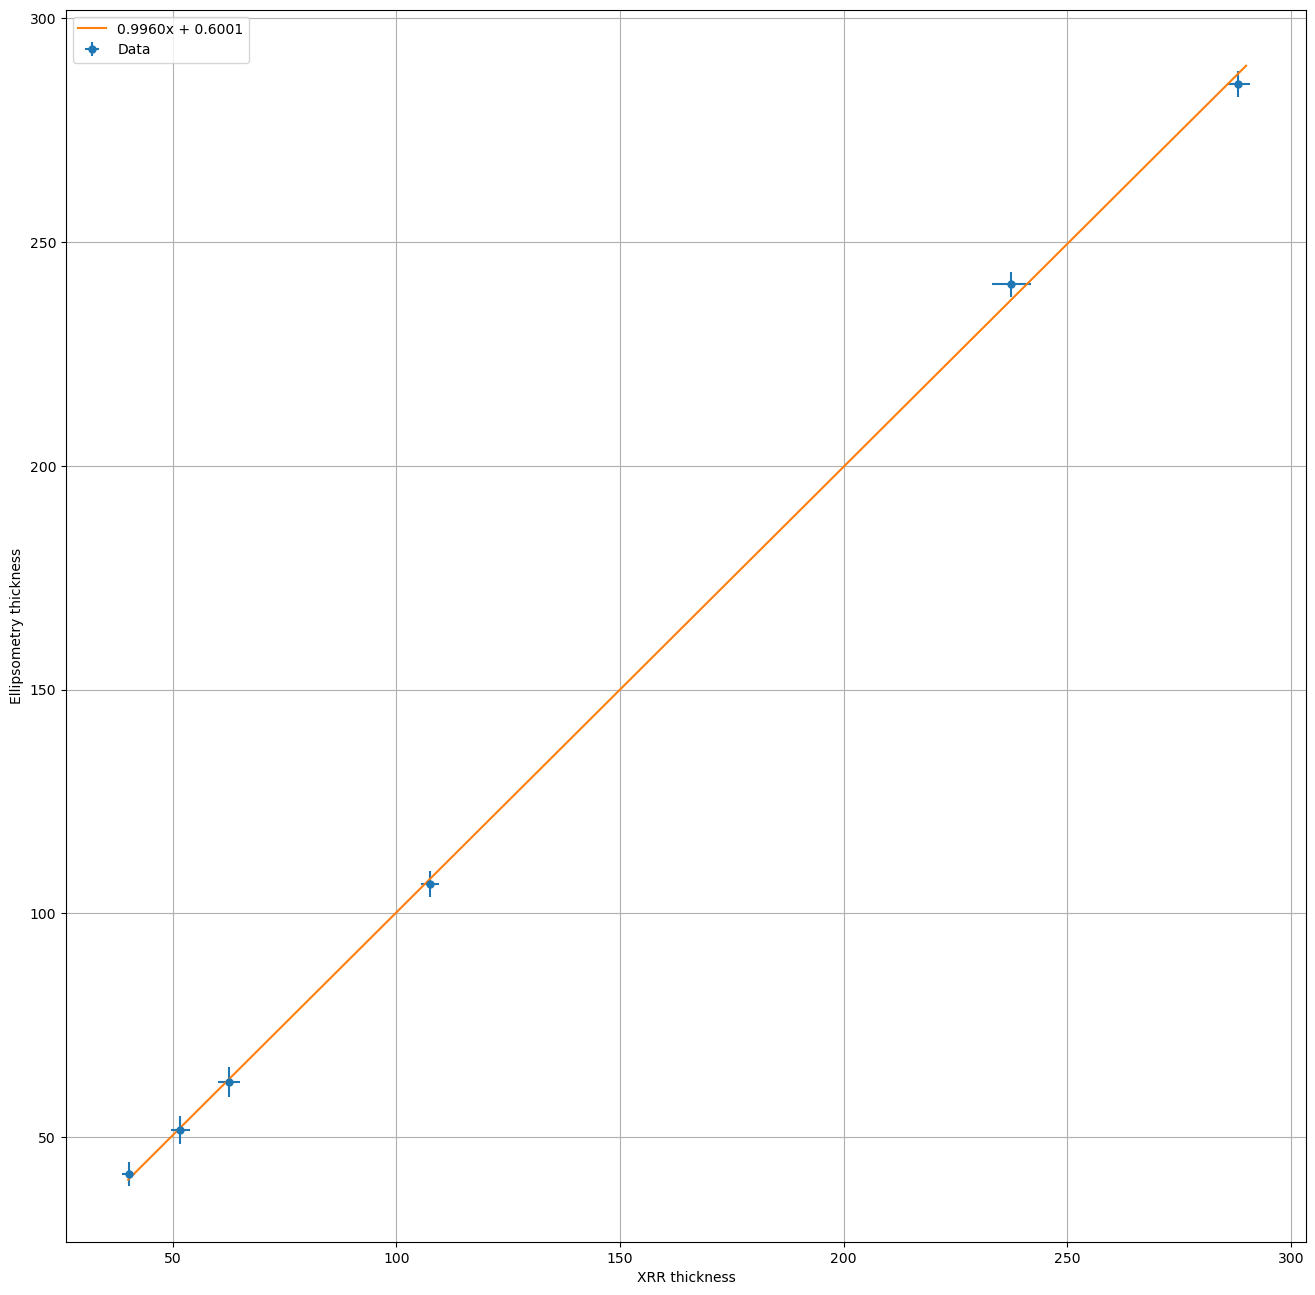

In [41]:
f, ax = plt.subplots(figsize=(16,16))

fit = simpleLinReg(all_data[0:,1][mask], all_data[0:,3][mask])

ax.errorbar(all_data[0:,1][mask], all_data[0:,3][mask],
            xerr=all_data[0:,2][mask], yerr=all_data[0:, 4][mask],
            linestyle="None", marker=".", markersize=10, label = "Data")

ax.set_xlabel("XRR thickness")
ax.set_ylabel("Ellipsometry thickness")

ax.plot(np.linspace(40, 290), np.linspace(40, 290)*fit[0] + fit[1],
        label="{0[0]:.4f}x + {0[1]:.4f}".format(fit))

ax.grid(True)
ax.legend(loc="upper left")

print(fit[0], fit[1])

plt.savefig("xrr_vs_ell.png")